In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('results_2015.csv')

In [3]:
df.top_5_avg.mean()

68.651346024781887

In [4]:
df.groupby('region').top_5_avg.mean()

region
Ajmer                 71.749826
Calcutta/Cuttack      74.635391
Chennai/Trivandrum    81.903683
Dehradun/Allahabad    64.689822
Delhi                 65.715727
Guwahati              47.366765
Panchkula             69.247024
Patna                 64.540933
Name: top_5_avg, dtype: float64

In [5]:
df['is_pass'] = df['fin_result'] == 'PASS'

In [6]:
df.groupby('region').is_pass.mean()

region
Ajmer                 0.878388
Calcutta/Cuttack      0.802756
Chennai/Trivandrum    0.973380
Dehradun/Allahabad    0.732497
Delhi                 0.824826
Guwahati              0.505108
Panchkula             0.810249
Patna                 0.564636
Name: is_pass, dtype: float64

In [7]:
df.region.value_counts()

Dehradun/Allahabad    14755
Panchkula             12353
Delhi                 12205
Chennai/Trivandrum    10631
Ajmer                  8116
Guwahati               4209
Calcutta/Cuttack       2758
Patna                  2692
dtype: int64

In [8]:
df.groupby('region').MATHEMATICS_total.mean()

region
Ajmer                 62.665830
Calcutta/Cuttack      57.806888
Chennai/Trivandrum    73.453807
Dehradun/Allahabad    50.899782
Delhi                 60.412803
Guwahati              33.779097
Panchkula             52.208259
Patna                 47.619578
Name: MATHEMATICS_total, dtype: float64

In [9]:
df.groupby('region').MATHEMATICS_total.count()/df.region.value_counts()

Ajmer                 0.540168
Calcutta/Cuttack      0.831762
Chennai/Trivandrum    0.810460
Dehradun/Allahabad    0.527482
Delhi                 0.362229
Guwahati              0.100024
Panchkula             0.450903
Patna                 0.633730
dtype: float64

In [10]:
surname = df.groupby('last_name')['top_5_avg'].agg(['mean', 'count'])

In [11]:
firstname = df.groupby('first_name')['top_5_avg'].agg(['mean', 'count'])

In [12]:
len(surname)

9970

In [13]:
len(firstname)

14147

In [14]:
len(df)

67719

In [15]:
subjects = ['ACCOUNTANCY_total', 'BIOLOGY_total', 'BIOTECHNOLOGY_total', 'BUSINESS STUDIES_total',
            'CHEMISTRY_total', 'COMPUTER SCIENCE_total', 'ECONOMICS_total', 'ENGLISH CORE_total', 'GEOGRAPHY_total',
            'HINDI CORE_total', 'HISTORY_total', 'MARKETING_total', 'MATHEMATICS_total',
            'PAINTING_total', 'PHYSICAL EDUCATION_total', 'PHYSICS_total', 'POLITICAL SCIENCE_total', 'PSYCHOLOGY_total',
            'PUNJABI_total', 'SANSKRIT CORE_total', 'SOCIOLOGY_total', 'TAMIL_total']

In [16]:
df[subjects].count()

ACCOUNTANCY_total           19276
BIOLOGY_total               11574
BIOTECHNOLOGY_total           328
BUSINESS STUDIES_total      19366
CHEMISTRY_total             34861
COMPUTER SCIENCE_total      10643
ECONOMICS_total             24704
ENGLISH CORE_total          60516
GEOGRAPHY_total              5619
HINDI CORE_total             7822
HISTORY_total                8635
MARKETING_total               522
MATHEMATICS_total           35195
PAINTING_total               2776
PHYSICAL EDUCATION_total    30847
PHYSICS_total               35036
POLITICAL SCIENCE_total      9237
PSYCHOLOGY_total              846
PUNJABI_total                 956
SANSKRIT CORE_total          1051
SOCIOLOGY_total              1284
TAMIL_total                   124
dtype: int64

In [21]:
df['took_math'] = df.apply(lambda row: pd.notnull(row['MATHEMATICS_total']), axis=1)
df['took_english'] = df.apply(lambda row: pd.notnull(row['ENGLISH CORE_total']), axis=1)
df['pcm'] = df.apply(lambda row: pd.notnull(row['MATHEMATICS_total']) * pd.notnull(row['PHYSICS_total']) * pd.notnull(row['CHEMISTRY_total']), axis=1)
df['pcb'] = df.apply(lambda row: pd.notnull(row['BIOLOGY_total']) * pd.notnull(row['PHYSICS_total']) * pd.notnull(row['CHEMISTRY_total']), axis=1)
df['pcmb'] = df.apply(lambda row: pd.notnull(row['BIOLOGY_total']) * pd.notnull(row['PHYSICS_total']) * pd.notnull(row['CHEMISTRY_total']) * pd.notnull(row['MATHEMATICS_total']), axis=1)
df['science_student'] = df['pcm'] + df['pcb']
df['science_student'] = df['science_student'].apply(bool)
df[['took_math', 'took_english', 'pcm', 'pcb', 'pcmb', 'science_student']].mean()

took_math          0.519721
took_english       0.893634
pcm                0.414832
pcb                0.169495
pcmb               0.073539
science_student    0.510787
dtype: float64

In [22]:
df.groupby('pcmb').top_5_avg.mean()

pcmb
0       67.913987
1       77.768243
Name: top_5_avg, dtype: float64

In [23]:
df.groupby('science_student').top_5_avg.mean()

science_student
False              63.237851
True               73.653860
Name: top_5_avg, dtype: float64

In [24]:
df.groupby('took_math').top_5_avg.mean()

took_math
False        63.074229
True         73.620598
Name: top_5_avg, dtype: float64

In [25]:
df.groupby('pcm').top_5_avg.mean()

pcm
0      64.874059
1      73.822996
Name: top_5_avg, dtype: float64

In [26]:
df.groupby('region').science_student.mean()

region
Ajmer                 0.649088
Calcutta/Cuttack      0.801305
Chennai/Trivandrum    0.675571
Dehradun/Allahabad    0.600746
Delhi                 0.236542
Guwahati              0.107389
Panchkula             0.458431
Patna                 0.766716
Name: science_student, dtype: float64

In [27]:
df[df.last_name == 'KHAN'].science_student.mean()

0.43656716417910446

In [28]:
df[df.last_name == 'KHAN'].took_math.mean()

0.34701492537313433

In [29]:
df[df.last_name == 'ALI'].science_student.mean()

0.47115384615384615

In [30]:
df[df.last_name == 'ALI'].took_math.mean()

0.34615384615384615

In [49]:
df[df.last_name == 'SHARMA'].science_student.mean()

0.51014957264957261

In [50]:
df[df.last_name == 'SHARMA'].took_math.mean()

0.50480769230769229

In [33]:
df[df.last_name == 'YADAV'].science_student.mean()

0.5708390646492435

In [34]:
df[df.last_name == 'YADAV'].took_math.mean()

0.54332874828060518

In [35]:
df[df.last_name == 'KUMAR'].science_student.mean()

0.54383651944627553

In [36]:
df[df.last_name == 'KUMAR'].took_math.mean()

0.55833882663150958

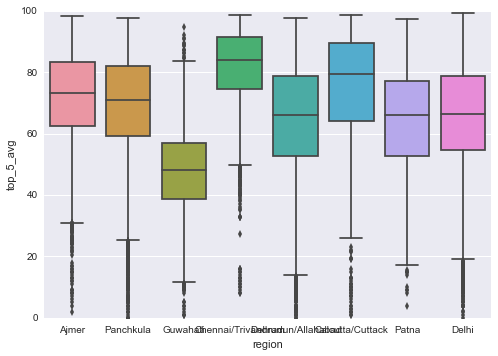

In [37]:
sns.boxplot(x='region', y = 'top_5_avg', data=df)

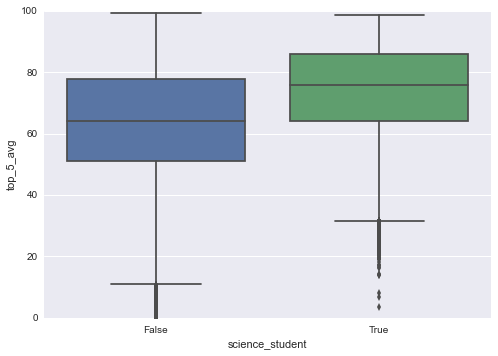

In [38]:
sns.boxplot(x='science_student', y = 'top_5_avg', data=df)

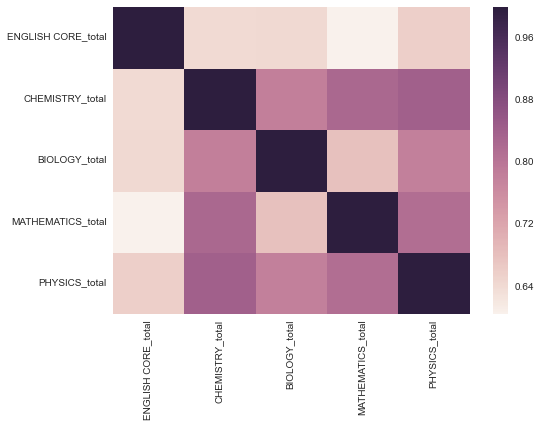

In [46]:
sns.heatmap(df[['ENGLISH CORE_total', 'CHEMISTRY_total', 'BIOLOGY_total', 'MATHEMATICS_total', 'PHYSICS_total']].corr())